# EL MEKKI Hafsa
# The Sparks Foundation
# Task 2
# Prediction using Unsupervised ML

We have to predict the optimum number of clusters and represent it visually.

#  Import libraries required 

In [126]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [139]:
#Load the iris dataset
iris = pd.read_csv('iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [128]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [129]:
iris.head()
#print the first 5 rows of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [130]:
iris.tail()
#print the last 5 rows of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [131]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [132]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])
iris['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

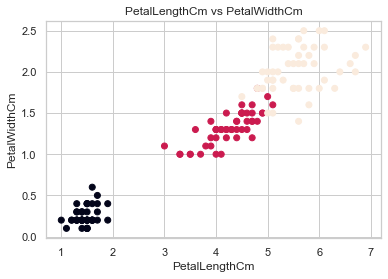

In [134]:
#PetalLengthCm vs PetalWidthCm 
#to see how accuate is our model

plt.scatter(iris['PetalLengthCm'],iris['PetalWidthCm'],c=iris['Species'])
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('PetalLengthCm vs PetalWidthCm')
plt.show()

In [135]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


# Data visualization

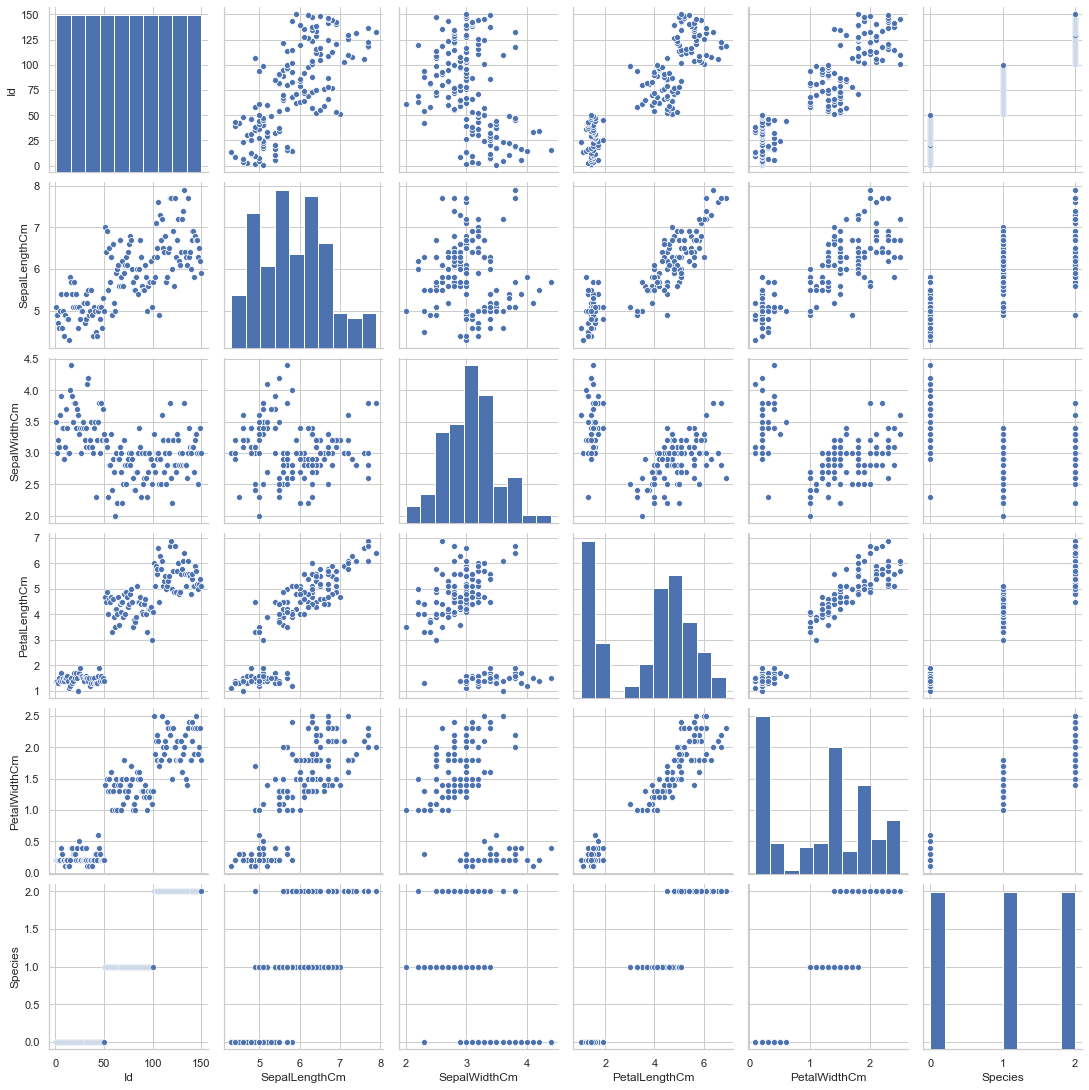

In [136]:
sns.pairplot(iris)

We can see that Species are mainly depend on Petal Length and Petal Width.

In [140]:
#remove columns we don't need (id and Species)
iris=iris.iloc[:,[1,2,3,4]]
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Elbow Method

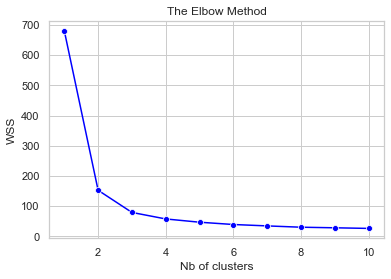

In [141]:
# k-means clustering for different values of k

from sklearn.cluster import KMeans
wss=[] #within-cluster sum of square 
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state=None)
    kmeans.fit(iris)
    wss.append(kmeans.inertia_)
    
sns.set(style='whitegrid')
sns.lineplot(range(1, 11), wss,marker='o',color='blue')
plt.title('The Elbow Method')
plt.xlabel('Nb of clusters')
plt.ylabel('WSS')

plt.show()

The location of the bend in the plot is considered as an indicator of the appropriate number of clusters.
So the optimum value for K would be 3.

In [142]:
#Create kmeans classifier 
iris=iris.values
kmeans = KMeans(n_clusters = 3,init='k-means++', n_init = 10,random_state=None)
y_kmeans = kmeans.fit_predict(iris)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

# Visualizing the Clusters

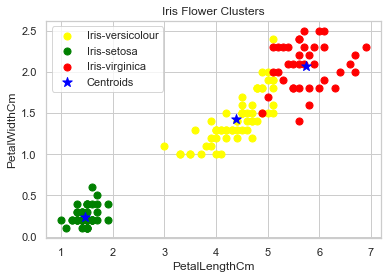

In [124]:
plt.scatter(iris[y_kmeans == 0, 2], iris[y_kmeans == 0, 3], s = 50 , c='yellow', label = 'Iris-versicolour')

plt.scatter(iris[y_kmeans == 1, 2], iris[y_kmeans == 1, 3], s = 50,c='green', label = 'Iris-setosa')

plt.scatter(iris[y_kmeans == 2, 2], iris[y_kmeans == 2, 3], s = 50,c='red' ,label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3],s = 100, c = 'blue', label = 'Centroids',marker="*")

plt.title("Iris Flower Clusters")
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")

plt.legend()
plt.show()